<a href="https://colab.research.google.com/github/yashika-ishi/CODEWITHHARRY_TUTORIAL_PRACTICE/blob/main/week3_assignment_gas_prices_data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Celebal Technologies**
*Celebel Summer Internship (CSI)*
<br>
WEEK-3
<br>
Assignment : Data Visualisation
<br>
Description:
<br>
1. Take Any dataset of your choice and do the visualization
    <br>Resources :<br>
    https://www.youtube.com/watch?v=0P7QnIQDBJY
    https://www.kaggle.com/code/junaiddata35/titanic-dataset-exploratory-data-analysis-eda

 DATASET: gas_prices (https://github.com/KeithGalli/matplotlib_tutorial/blob/master/gas_prices.csv)

***By: Yashika***

# **IMPORTING LIBRARIES**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **LOAD & CLEAN DATASET**

In [ ]:
# Load the gas prices dataset
gas = pd.read_csv(r"/content/drive/MyDrive/CSI DATASETS/gas_prices.csv")

# Inspect dataset
print("Initial data preview:")
print(gas.head())
print("\nInfo:\n", gas.info())

# Remove duplicate rows if any
gas.drop_duplicates(inplace=True)

# Check and handle missing values
if gas.isnull().sum().sum() > 0:
    print("\nMissing values found. Dropping rows with missing values...")
    gas.dropna(inplace=True)

# Ensure correct data type for 'Year'
gas['Year'] = gas['Year'].astype(int)

# Replace negative values with NaN, then drop rows
gas[gas.columns[1:]] = gas[gas.columns[1:]].where(gas[gas.columns[1:]] >= 0)
gas.dropna(inplace=True)

# Reset index after cleaning
gas.reset_index(drop=True, inplace=True)

# Final data check
print("\nCleaned data preview:")
print(gas.head())

Initial data preview:
   Year  Australia  Canada  France  Germany  Italy  Japan  Mexico  \
0  1990        NaN    1.87    3.63     2.65   4.59   3.16    1.00   
1  1991       1.96    1.92    3.45     2.90   4.50   3.46    1.30   
2  1992       1.89    1.73    3.56     3.27   4.53   3.58    1.50   
3  1993       1.73    1.57    3.41     3.07   3.68   4.16    1.56   
4  1994       1.84    1.45    3.59     3.52   3.70   4.36    1.48   

   South Korea    UK   USA  
0         2.05  2.82  1.16  
1         2.49  3.01  1.14  
2         2.65  3.06  1.13  
3         2.88  2.84  1.11  
4         2.87  2.99  1.11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         19 non-null     int64  
 1   Australia    18 non-null     float64
 2   Canada       19 non-null     float64
 3   France       19 non-null     float64
 4   Germany      19 non-null     

# **LINE CHART**

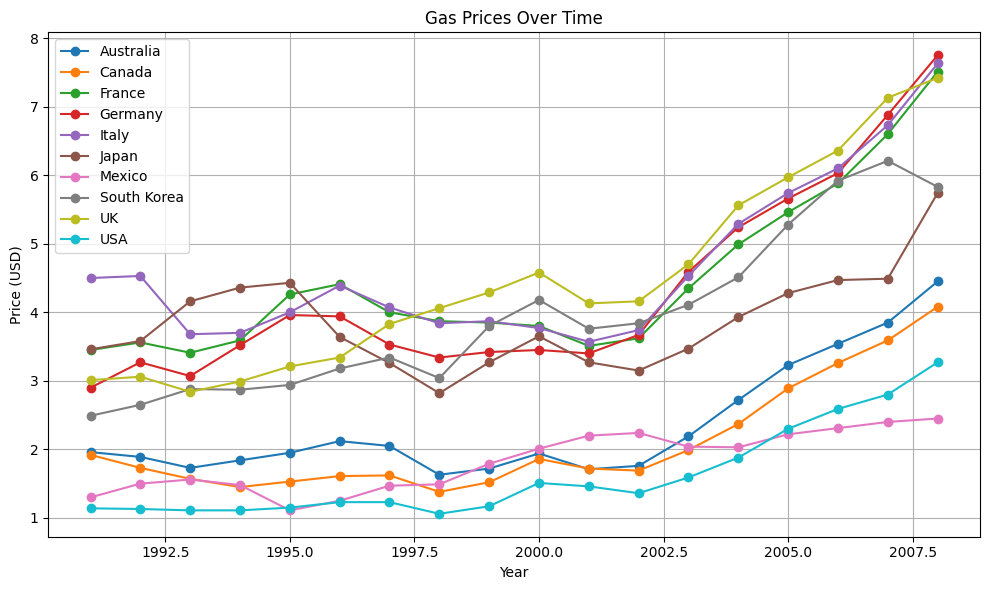

In [ ]:
# Plotting gas prices over time for all listed countries
plt.figure(figsize=(10, 6))
countries = ['Australia', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'Mexico', 'South Korea', 'UK', 'USA' ]
for country in countries:
    plt.plot(gas['Year'], gas[country], marker='o', label=country)
plt.title('Gas Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **AREA CHART**

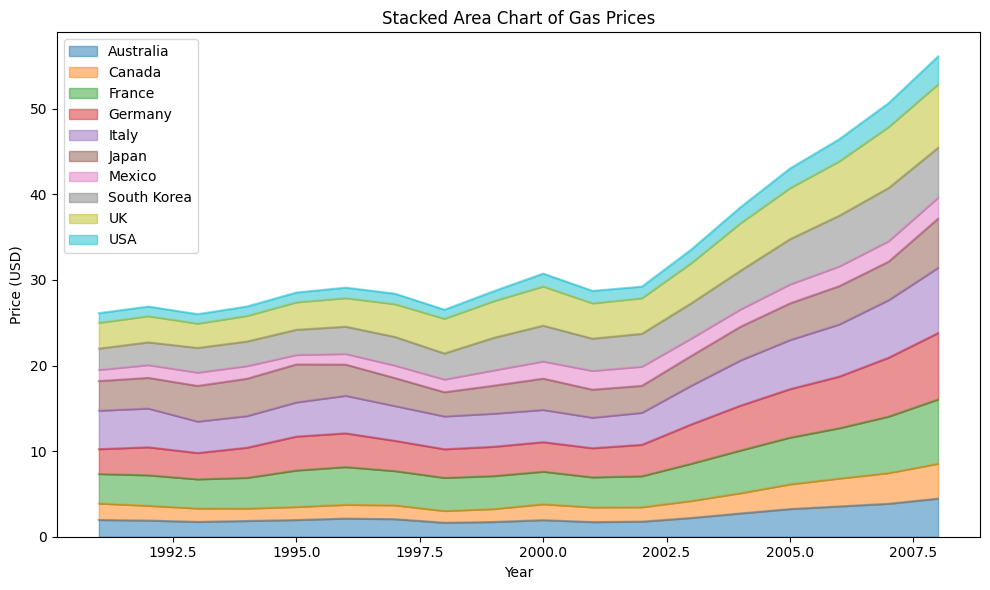

In [ ]:
# Stacked area chart to show cumulative price changes
gas.set_index('Year', inplace=True)
gas.plot.area(figsize=(10, 6), alpha=0.5)
plt.title('Stacked Area Chart of Gas Prices')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()
gas.reset_index(inplace=True)

# **BAR CHART**

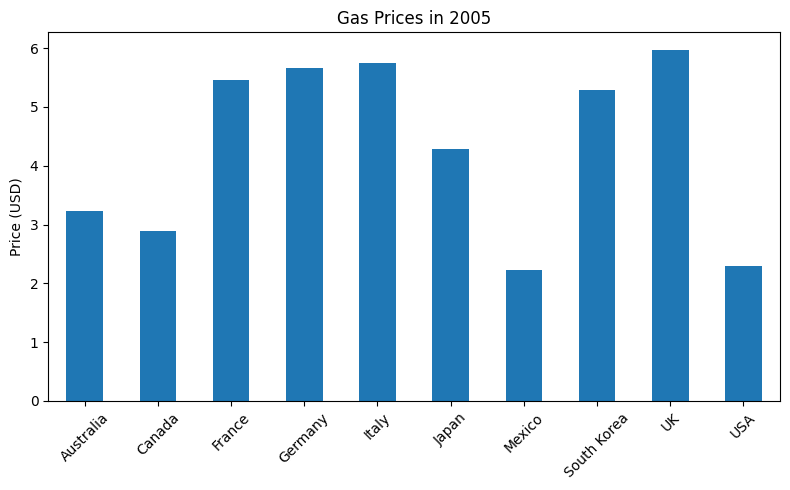

In [ ]:
# Bar chart for gas prices in a specific year (2005)
selected_year = 2005
data = gas[gas['Year'] == selected_year].iloc[0, 1:]
data.plot(kind='bar', figsize=(8, 5))
plt.title(f'Gas Prices in {selected_year}')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **PIE CHART**

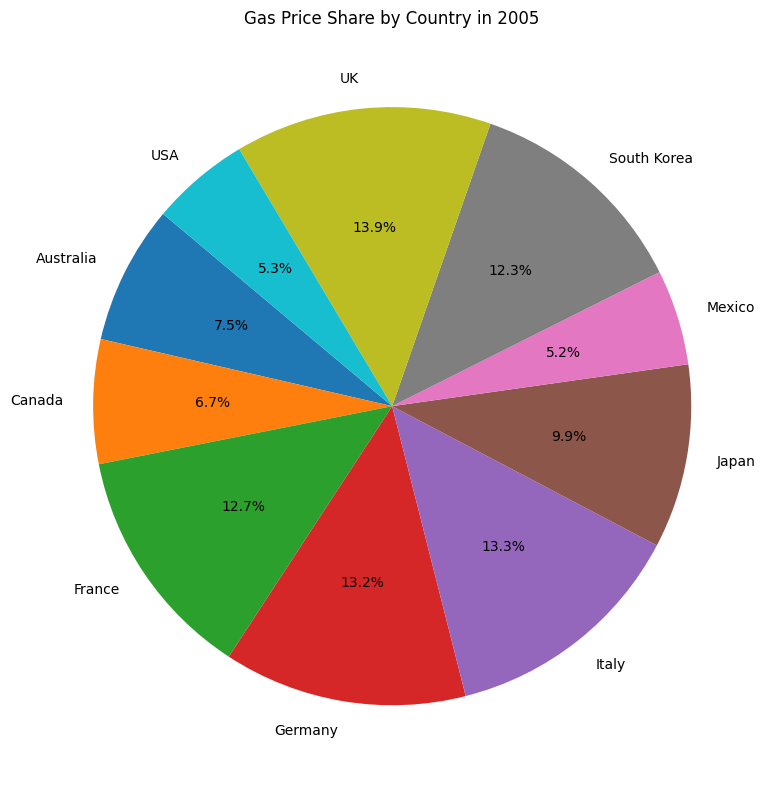

In [ ]:
# Pie chart showing country-wise price share in a specific year
year = 2005
data = gas[gas['Year'] == year].iloc[0, 1:]  # skip 'Year' column
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Gas Price Share by Country in {year}')
plt.tight_layout()
plt.show()

# **SUBPLOT**

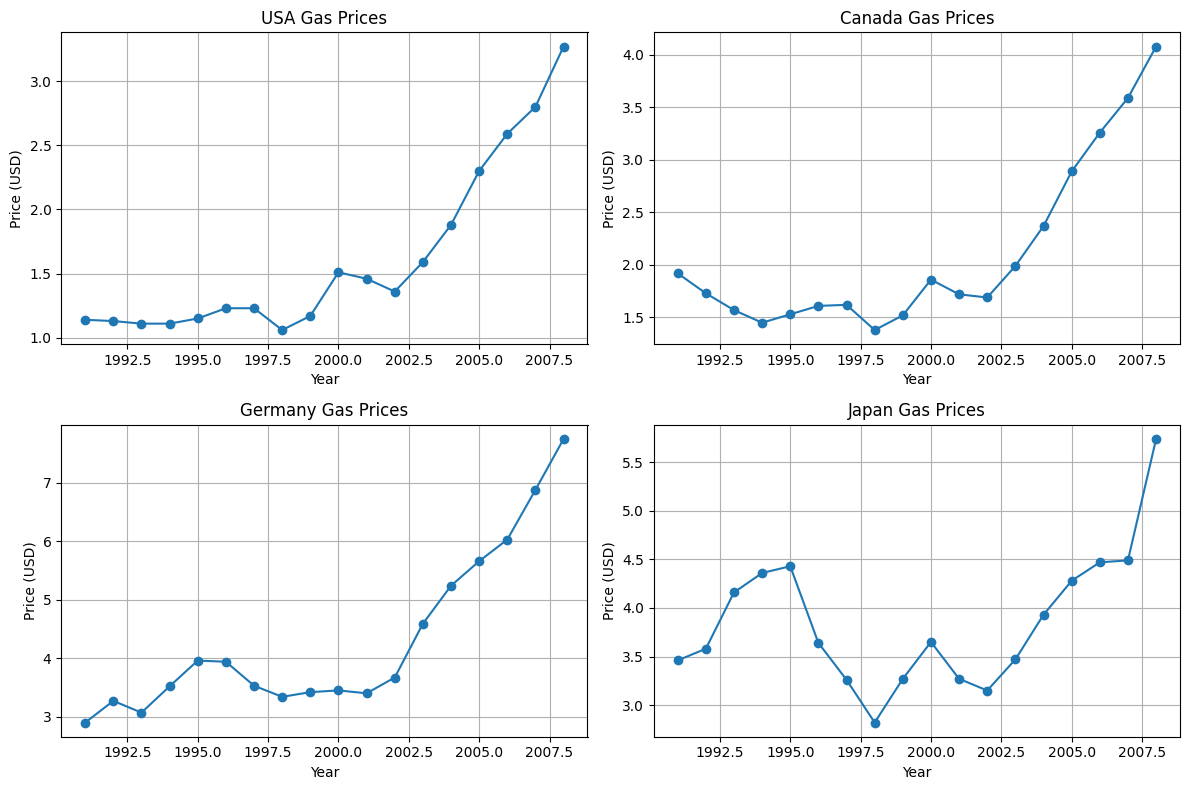

In [ ]:
#  Subplot for 4 Countries (2x2 Grid)
countries = ['USA', 'Canada', 'Germany', 'Japan']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

for i, country in enumerate(countries):
    row = i // 2
    col = i % 2
    axs[row, col].plot(gas['Year'], gas[country], marker='o')
    axs[row, col].set_title(f"{country} Gas Prices")
    axs[row, col].set_xlabel("Year")
    axs[row, col].set_ylabel("Price (USD)")
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

# **HISTOGRAM**

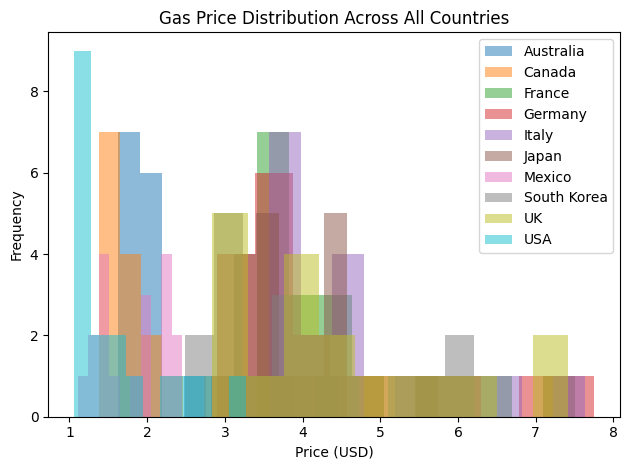

In [ ]:
# Histogram showing distribution of gas prices across countries
for country in gas.columns[1:]:
    plt.hist(gas[country], bins=10, alpha=0.5, label=country)
plt.title("Gas Price Distribution Across All Countries")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# **SCATTER PLOT**

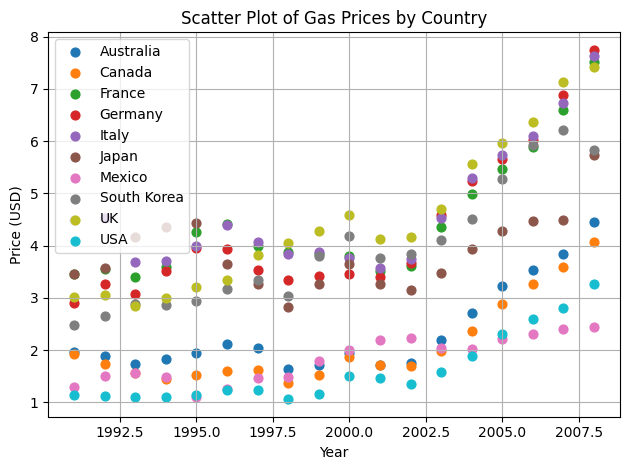

In [ ]:
# Scatter plot of gas prices by year for each country
for country in gas.columns[1:]:
    plt.scatter(gas['Year'], gas[country], label=country, s=40)
plt.title("Scatter Plot of Gas Prices by Country")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()